In [1]:
import os
import re
import glob
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors
from mpl_interactions import ioff, panhandler, zoom_factory

In [2]:
hits = pd.read_hdf("../config/ATPC_single.h5", "MC/hits")
parts = pd.read_hdf("../config/ATPC_single.h5", "MC/particles")

event_cut = parts[ (parts.primary == 1) & (parts.kin_energy>0.1)  & (parts.kin_energy<0.2)].event_id

hits = hits[hits.event_id.isin(event_cut)]
print(hits.event_id.unique())


[  4  16  27  65  71  85 109 129 134 139 144 225 245 246 248 305 322 355
 421 459 510 521 573 582 596 615 618 641 704 709 713 765 775 780 806 809
 811 845 870 872 913 972]


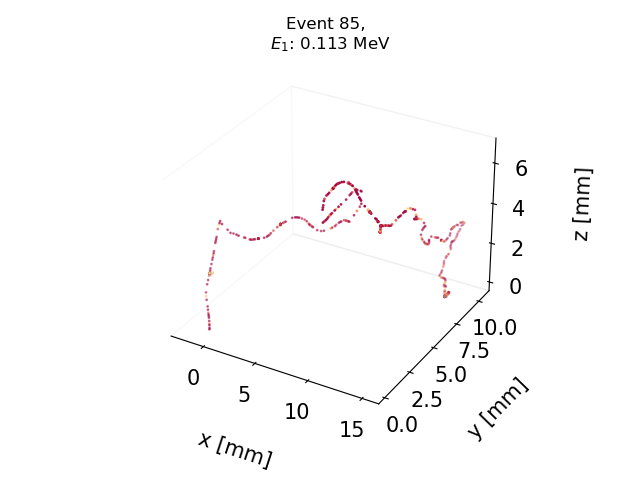

In [3]:
%matplotlib widget

# list = signal_events
# df   = combined_df_sig
# df_parts = combined_df_sig_part
# name = "SigMisclassified"
# sig = True


list = [85]

for eid in list:
    event_hits = hits[hits.event_id == eid]
    

    event_parts = parts[parts.event_id == eid]

    # Make a 3D view of the track
    # fig  = plt.figure(figsize=(10, 10))
    with plt.ioff():
        fig, axis = plt.subplots()

    # Create 3D axes
    ax = fig.add_subplot(111, projection='3d')

    fig.set_facecolor('white')
    ax.set_facecolor('white')
    # ax.scatter(df.x, df.y,  df.z,c= df.energy, cmap='Spectral', s=0.1, label = "reco hits")
    ax.scatter(event_hits.x, event_hits.y,  event_hits.z,c= event_hits.energy, cmap='Spectral', s=1, label = "reco hits")

    ax.set_xlabel("x [mm]", fontsize = 15, labelpad=20)
    ax.set_ylabel("y [mm]", fontsize = 15, labelpad=20)
    ax.set_zlabel("z [mm]", fontsize = 15, labelpad=20)
    plt.tick_params(axis='both', which='both', labelsize=15)  # Adjust labelsize as needed

    # Set the color of the axes labels and ticks to white
    ax.xaxis.label.set_color('black')
    ax.yaxis.label.set_color('black')
    ax.zaxis.label.set_color('black')
    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis='y', colors='black')
    ax.tick_params(axis='z', colors='black')

    # Set the color of the spines (borders) to white
    ax.spines['bottom'].set_color('black')
    ax.spines['top'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.spines['left'].set_color('black')

    # Remove background (axis)
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False

    # ax.set_xlim(-100, 400)
    # ax.set_ylim(0, 1000)
    # ax.set_zlim(1500, 3000)


    E1 = event_parts[event_parts.particle_id == 1].kin_energy.iloc[0]
    ax.set_title(f"Event {eid}, \n $E_1$: {E1:.3f} MeV")

    # legend = plt.legend(facecolor = "black")

    # Set the text color of the legend
    # for text in legend.get_texts():
    #     text.set_color('white')  # Set the text color to red

    ax.grid(False)
    axis.axis('off')

    disconnect_zoom = zoom_factory(axis)
    # Enable scrolling and panning with the help of MPL
    # Interactions library function like panhandler.
    pan_handler = panhandler(fig)
    display(fig.canvas)

    # plt.savefig(f"../data/{name}/Event{eid}.png",dpi=500)
    # pd.set_option('display.max_rows', 1000)
    # display(event_parts)
